In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Feature Selection

In [4]:
df.shape

(303, 14)

In [29]:
X=pd.read_csv('heart.csv',usecols=['age','trtbps','chol','thalachh','oldpeak'])
X

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [30]:
y=df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
df.corr()>0.5

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sex,False,True,False,False,False,False,False,False,False,False,False,False,False,False
cp,False,False,True,False,False,False,False,False,False,False,False,False,False,False
trtbps,False,False,False,True,False,False,False,False,False,False,False,False,False,False
chol,False,False,False,False,True,False,False,False,False,False,False,False,False,False
fbs,False,False,False,False,False,True,False,False,False,False,False,False,False,False
restecg,False,False,False,False,False,False,True,False,False,False,False,False,False,False
thalachh,False,False,False,False,False,False,False,True,False,False,False,False,False,False
exng,False,False,False,False,False,False,False,False,True,False,False,False,False,False
oldpeak,False,False,False,False,False,False,False,False,False,True,False,False,False,False


<AxesSubplot:>

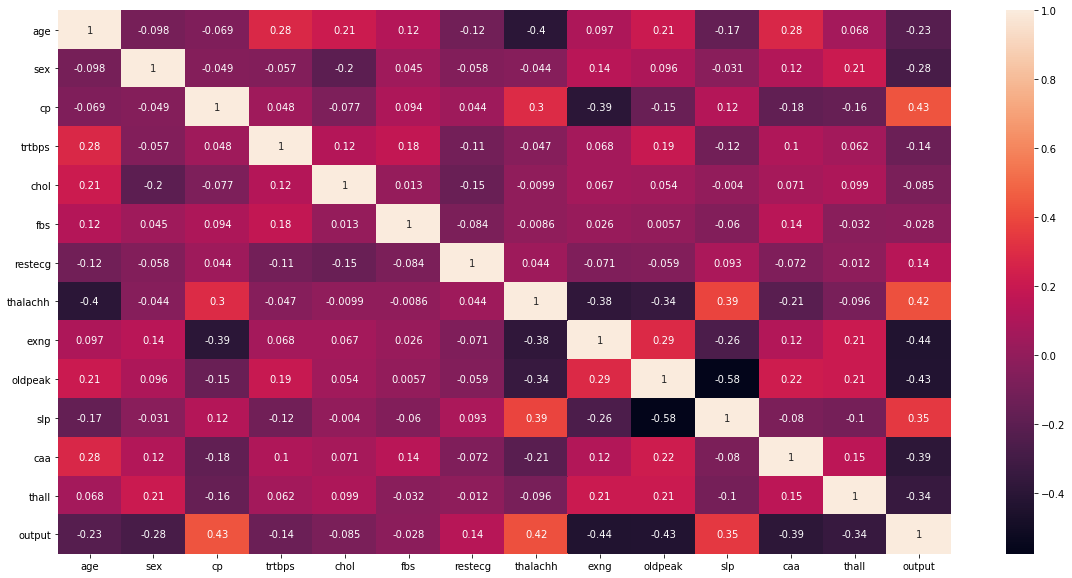

In [25]:
figure = plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

In [32]:
X

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [73]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
model.score(X_test,y_test)

0.6373626373626373

In [38]:
# Using Logistic Regresion

In [75]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6483516483516484

In [76]:
# using svm

from sklearn.svm import SVC

model=SVC()


model.fit(X_train,y_train)
model.score(X_test,y_test)


0.6153846153846154

In [77]:
# Using Naive Byaes

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6043956043956044

In [43]:
X

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [78]:
#Scale the cols
#trtbps chol thalachh
from sklearn.preprocessing import MinMaxScaler

X_scale=X.drop(['trtbps','chol','thalachh'],axis=1)

scaler=MinMaxScaler()
X_scale['trtbps']=scaler.fit_transform(np.array(X['trtbps']).reshape(-1,1)).flatten()
X_scale['chol']=scaler.fit_transform(np.array(X['chol']).reshape(1,-1)).flatten()
X_scale['thalachh']=scaler.fit_transform(np.array(X['thalachh']).reshape(1,-1)).flatten()

X_scale


,age,oldpeak,trtbps,chol,thalachh
0,63,2.3,0.481132,0.0,0.0
1,37,3.5,0.339623,0.0,0.0
2,41,1.4,0.339623,0.0,0.0
3,56,0.8,0.245283,0.0,0.0
4,57,0.6,0.245283,0.0,0.0
...,...,...,...,...,...
298,57,0.2,0.433962,0.0,0.0
299,45,1.2,0.150943,0.0,0.0
300,68,3.4,0.471698,0.0,0.0
301,57,1.2,0.339623,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('KNN: ',knn.score(X_test,y_test))

LR=LogisticRegression()
LR.fit(X_train,y_train)
print('Logistic: ',LR.score(X_test,y_test))

svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
